# Description

This notebook contains the interpretation of a cluster (which features/latent variables in the original data are useful to distinguish traits in the cluster).

See section [LV analysis](#lv_analysis) below

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import HTML
from tqdm import tqdm

from clustering.methods import ClusterInterpreter
from data.recount2 import LVAnalysis
from data.cache import read_data
import conf

# Settings

In [3]:
# PARTITION_K = 26
# PARTITION_CLUSTER_ID = 18

# Load MultiPLIER summary

In [4]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [5]:
multiplier_model_summary.shape

(2157, 5)

In [6]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [10]:
data = pd.read_pickle(input_filepath)

In [11]:
data.shape

(3752, 987)

In [12]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


## Clustering partitions

In [13]:
# CONSENSUS_CLUSTERING_DIR = Path(
#     conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
# ).resolve()

# display(CONSENSUS_CLUSTERING_DIR)

In [14]:
# input_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
# display(input_file)

In [15]:
# best_partitions = pd.read_pickle(input_file)

In [16]:
# best_partitions.shape

In [17]:
# best_partitions.head()

# Functions

In [18]:
# def show_cluster_stats(data, partition, cluster):
#     cluster_traits = data[partition == cluster].index
#     display(f"Cluster '{cluster}' has {len(cluster_traits)} traits")
#     display(cluster_traits)

# LV analysis
<a id="lv_analysis"></a>

## Associated traits

In [19]:
# display(best_partitions.loc[PARTITION_K])
# part = best_partitions.loc[PARTITION_K, "partition"]

In [20]:
# show_cluster_stats(data, part, PARTITION_CLUSTER_ID)

## Associated latent variables

In [21]:
# ci = ClusterInterpreter(
#     threshold=1.0,
#     max_features=20,
#     max_features_to_explore=100,
# )

In [22]:
# ci.fit(data, part, PARTITION_CLUSTER_ID)

In [23]:
# ci.features_

In [24]:
# # save interpreter instance
# output_dir = Path(
#     conf.RESULTS["CLUSTERING_INTERPRETATION"]["BASE_DIR"],
#     "cluster_lvs",
#     f"part{PARTITION_K}",
# )
# output_dir.mkdir(exist_ok=True, parents=True)

In [25]:
# output_file = Path(
#     output_dir, f"cluster_interpreter-part{PARTITION_K}_k{PARTITION_CLUSTER_ID}.pkl"
# )
# display(output_file)

In [26]:
# ci.features_.to_pickle(output_file)

## Top attributes

In [27]:
# lvs_list = "LV116,LV931,LV744,LV697,LV885,LV536,LV550,LV220,LV272,LV739,LV678,LV470,LV66,LV189,LV517,LV840,LV246,LV502,LV525,LV85".split(",")

In [29]:
lvs_list = pd.read_pickle("/tmp/lv_list.pkl").index.tolist()

In [30]:
len(lvs_list)

497

In [31]:
lvs_list[:10]

['LV38',
 'LV881',
 'LV116',
 'LV163',
 'LV74',
 'LV1',
 'LV509',
 'LV824',
 'LV840',
 'LV189']

In [32]:
def _my_func(x):
    _cols = [c for c in x.index if not c.startswith("LV")]
    _tmp = x[_cols].dropna()
    if _tmp.shape[0] > 0:
        return _tmp.iloc[0]

    return None

In [33]:
cell_type_dfs = []
tissue_dfs = []

pbar = tqdm(lvs_list[:50])
for lv_name in pbar:
    pbar.set_description(lv_name)

    #     lv_name = lv_info["name"]
    lv_obj = LVAnalysis(lv_name, data)

    #     # show lv prior knowledge match (pathways)
    #     lv_pathways = multiplier_model_summary[
    #         multiplier_model_summary["LV index"].isin((lv_name[2:],))
    #         & (
    #             (multiplier_model_summary["FDR"] < 0.05)
    #             | (multiplier_model_summary["AUC"] >= 0.75)
    #         )
    #     ]
    #     display(lv_pathways)

    lv_data = lv_obj.get_experiments_data()

    #     display("")
    #     display(lv_obj.lv_traits.head(20))
    #     display("")
    #     display(lv_obj.lv_genes.head(10))

    # get cell type attributes
    #     lv_attrs = lv_obj.get_attributes_variation_score()
    lv_attrs = pd.Series(lv_data.columns.tolist())
    lv_attrs = lv_attrs[
        lv_attrs.str.match(
            "(?:cell[^\w]*type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    lv_attrs_data = lv_data[lv_attrs.tolist() + [lv_name]]
    lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
    lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.tolist())
    lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
    lv_attrs_data = lv_attrs_data.rename(columns={lv_name: "lv"})
    cell_type_dfs.append(lv_attrs_data)

    # get tissue attributes
    lv_attrs = pd.Series(lv_data.columns.tolist())
    lv_attrs = lv_attrs[
        lv_attrs.str.match(
            "(?:tissue$)|(?:tissue[^\w]*type$)",
            case=False,
            flags=re.IGNORECASE,
        ).values
    ].sort_values(ascending=False)
    display(lv_attrs)

    lv_attrs_data = lv_data[lv_attrs.tolist() + [lv_name]]
    lv_attrs_data = lv_attrs_data.assign(attr=lv_attrs_data.apply(_my_func, axis=1))
    lv_attrs_data = lv_attrs_data.drop(columns=lv_attrs.tolist())
    lv_attrs_data = lv_attrs_data.dropna().sort_values(lv_name, ascending=False)
    lv_attrs_data = lv_attrs_data.rename(columns={lv_name: "lv"})
    tissue_dfs.append(lv_attrs_data)

LV38:   0%|          | 0/50 [00:00<?, ?it/s]

SRP066834, SRP050499, SRP042161, SRP057196, SRP033135, SRP028301, SRP055153, SRP059775, SRP059035, SRP030617, SRP058773, SRP055569, SRP052294, SRP060598, SRP055810, SRP028570, SRP055101, SRP011546, SRP050992, SRP062177, SRP015138, SRP014428, 

5    cell type
dtype: object

1    tissue
dtype: object

LV881:   2%|▏         | 1/50 [00:12<10:07, 12.39s/it]

SRP042161, SRP050499, SRP066834, SRP060416, SRP057196, SRP055569, SRP018525, SRP059035, SRP028301, SRP062773, SRP033135, SRP050440, SRP059379, SRP048603, SRP044917, SRP041102, SRP059775, SRP048604, SRP034711, SRP035312, SRP055101, SRP055153, SRP014428, SRP041255, SRP042286, SRP021509, SRP045570, SRP018838, SRP060370, SRP030617, SRP064457, SRP015138, SRP007461, SRP053186, SRP064259, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (34 != 35)
  warnings.warn(


1    cell type
dtype: object

7    tissue
dtype: object

LV116:   4%|▍         | 2/50 [00:26<10:15, 12.82s/it]

SRP059039, SRP045500, SRP063059, SRP045569, SRP015670, SRP059531, SRP062958, SRP039361, SRP056733, SRP060370, SRP062966, SRP045352, SRP048804, SRP032775, SRP059172, SRP050246, SRP064458, SRP033711, SRP049820, SRP023199, SRP060416, SRP005279, SRP042161, SRP059701, SRP068139, SRP051848, SRP014428, SRP063661, SRP057205, SRP041826, SRP059057, SRP064259, SRP046226, SRP044956, SRP066356, SRP048640, SRP041885, SRP045659, SRP041647, SRP045565, SRP041620, SRP053186, SRP045441, SRP022133, SRP055874, SRP029990, SRP044206, SRP065763, SRP056443, SRP041538, SRP044593, SRP019270, SRP067934, SRP059035, SRP019936, SRP054971, SRP058237, SRP051368, SRP019758, 

8      celltype
21    cell type
dtype: object

79    tissue type
4          tissue
dtype: object

LV163:   6%|▌         | 3/50 [00:38<09:56, 12.69s/it]

SRP019936, SRP045639, SRP017142, SRP052706, SRP007596, SRP009276, SRP042579, SRP039348, SRP064481, SRP008554, SRP012557, SRP019994, SRP010038, SRP051674, SRP028902, SRP051765, SRP061426, SRP007461, SRP060708, SRP034953, SRP022920, SRP065202, SRP051606, SRP055153, SRP017644, SRP017972, SRP051599, SRP016790, SRP021134, SRP044013, SRP045869, SRP063620, SRP060598, SRP063948, SRP014790, SRP026537, SRP013984, SRP014320, SRP034601, SRP017789, SRP049988, SRP028118, SRP018861, SRP040243, SRP017788, SRP017411, SRP049061, SRP046254, SRP066917, SRP009266, SRP034873, SRP002915, SRP067529, SRP042620, SRP014842, SRP041718, SRP057814, SRP008218, SRP059643, SRP032165, SRP067214, SRP033711, SRP046376, SRP023270, SRP015909, SRP045711, SRP017378, SRP032942, SRP057253, SRP028190, SRP052879, SRP067836, SRP004637, SRP049068, SRP017019, SRP045695, SRP063070, SRP052740, SRP068139, SRP018218, SRP039598, SRP059066, SRP017575, SRP061380, SRP051485, SRP055475, SRP003726, SRP043510, SRP014190, SRP006912, SRP019207,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (95 != 99)
  warnings.warn(


2    cell type
dtype: object

0     tissue type
12         tissue
dtype: object

LV74:   8%|▊         | 4/50 [00:44<08:12, 10.71s/it] 

SRP010038, SRP043166, SRP042161, SRP006970, SRP066834, SRP064323, SRP042249, SRP055569, SRP041825, SRP057196, SRP049988, SRP024274, SRP059035, SRP014428, SRP063840, SRP016059, SRP007596, SRP047082, SRP050179, SRP029262, SRP033135, SRP060416, SRP060355, SRP026042, SRP048562, SRP064464, SRP056498, SRP019241, SRP013022, SRP009266, SRP064259, SRP041751, SRP056530, SRP050499, SRP067701, SRP017435, SRP041846, SRP004637, SRP061329, SRP061682, SRP042620, SRP020491, SRP059379, SRP020493, SRP035391, SRP033393, SRP025989, SRP050892, SRP032812, SRP007461, SRP045711, SRP042616, SRP018218, SRP057205, SRP049591, SRP033078, SRP058740, SRP022166, SRP055863, SRP011895, SRP045639, SRP021509, SRP045859, SRP056220, SRP041036, SRP027383, SRP051705, SRP058783, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (66 != 68)
  warnings.warn(


0    cell type
dtype: object

4    tissue
dtype: object

LV1:  10%|█         | 5/50 [01:07<10:44, 14.31s/it] 

SRP019936, SRP058435, SRP015715, SRP007461, SRP041263, SRP064481, SRP042620, SRP026537, SRP044611, SRP014591, SRP014320, SRP017644, SRP034601, SRP059266, SRP021214, SRP004637, SRP061689, SRP055569, SRP014790, SRP023111, SRP033119, SRP015964, SRP018861, SRP043593, SRP067836, SRP051736, SRP060708, SRP065202, SRP036133, SRP059066, SRP049510, SRP005281, SRP050440, SRP046271, SRP061840, SRP048536, SRP020556, SRP012099, SRP060359, SRP019222, SRP026084, SRP041102, SRP032754, SRP028902, SRP058383, SRP042297, SRP045639, SRP007525, SRP044013, SRP064561, SRP063948, SRP060650, SRP008331, SRP008930, SRP060661, SRP003672, SRP002789, SRP009790, SRP057745, SRP007506, SRP001540, SRP017019, SRP063339, SRP049391, SRP014857, SRP010280, SRP050147, SRP013463, SRP058300, SRP019250, SRP032367, SRP022876, SRP033057, SRP002079, SRP023270, SRP041036, SRP040327, SRP046741, SRP058571, SRP029739, SRP012557, SRP028118, SRP039348, SRP064562, SRP012062, SRP035312, SRP034711, SRP007403, SRP057804, SRP060637, SRP034873,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (102 != 105)
  warnings.warn(


1    cell type
dtype: object

0    tissue type
5         tissue
dtype: object

LV509:  12%|█▏        | 6/50 [01:16<09:27, 12.89s/it]

SRP009266, SRP013725, SRP006575, SRP023262, SRP009862, SRP065202, SRP055569, SRP035391, SRP043962, SRP061241, SRP002487, SRP007596, SRP042579, SRP050365, SRP045869, SRP033119, SRP002915, SRP028815, SRP026315, SRP005177, SRP012056, SRP044611, SRP067214, SRP026537, SRP033369, SRP012461, SRP019936, SRP019994, SRP046749, SRP033135, SRP014739, SRP049500, SRP007461, SRP057196, SRP010350, SRP007359, SRP039348, SRP017644, SRP024268, SRP052950, SRP005279, SRP051102, SRP065559, SRP004637, SRP040136, SRP048536, SRP006475, SRP009276, SRP058120, SRP004847, SRP033276, SRP060416, SRP042161, SRP014320, SRP041210, SRP020493, SRP051599, SRP045905, SRP055153, SRP049988, SRP003611, SRP036821, SRP042616, SRP043378, SRP051765, SRP014790, SRP017789, SRP032510, SRP050036, SRP017411, SRP064464, SRP056696, SRP060661, SRP003726, SRP022920, SRP013984, SRP055810, SRP063620, SRP045898, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (75 != 79)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
4          tissue
dtype: object

LV824:  14%|█▍        | 7/50 [01:37<10:50, 15.13s/it]

SRP057205, SRP055569, SRP060416, SRP042161, SRP057196, SRP066834, SRP007498, SRP050499, SRP007947, SRP033135, SRP024268, SRP031507, SRP059379, SRP064464, SRP058773, SRP030617, SRP009862, SRP049340, SRP058351, SRP018719, SRP008218, SRP042119, SRP059279, SRP040145, SRP003726, SRP030475, SRP050992, SRP049391, SRP050147, SRP045294, SRP005129, SRP056076, SRP064259, SRP004847, SRP026537, SRP019241, SRP051472, SRP041263, SRP063867, SRP044611, SRP031858, SRP041008, SRP032928, SRP026033, SRP011378, SRP003021, SRP014320, SRP049475, SRP061840, SRP050365, SRP011546, SRP014626, SRP056084, SRP049593, SRP018861, SRP026084, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (54 != 56)
  warnings.warn(


5    cell type
dtype: object

10    tissue
dtype: object

LV840:  16%|█▌        | 8/50 [01:59<11:58, 17.10s/it]

SRP043417, SRP028301, SRP059775, SRP062177, SRP012056, SRP033119, SRP040278, SRP058300, SRP034543, SRP056084, SRP038695, SRP058841, SRP059948, SRP042161, SRP009266, SRP006475, SRP045501, SRP033369, SRP058773, SRP018861, SRP041036, SRP055810, SRP055569, SRP029245, SRP018719, SRP015964, SRP014867, SRP010280, SRP048536, SRP002605, SRP053402, SRP063339, SRP019250, SRP007461, SRP044653, SRP046749, SRP039397, SRP052950, SRP056036, SRP043962, SRP061539, SRP019989, SRP064481, SRP045481, SRP028887, SRP013725, SRP009861, SRP041263, SRP058087, SRP019241, SRP050055, SRP011546, SRP039348, SRP010430, SRP058191, SRP049510, SRP056200, SRP060637, SRP021214, SRP060416, SRP041656, SRP064464, SRP041396, SRP053052, SRP029515, SRP064317, SRP001349, SRP041130, SRP017644, SRP059266, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (68 != 70)
  warnings.warn(


2    cell type
dtype: object

52    tissue
dtype: object

LV189:  18%|█▊        | 9/50 [02:11<10:44, 15.73s/it]

SRP037775, SRP064259, SRP033250, SRP026537, SRP045322, SRP042620, SRP042161, SRP055569, SRP049500, SRP006575, SRP030475, SRP011974, SRP049507, SRP030401, SRP043470, SRP057205, SRP061241, SRP055512, SRP059379, SRP058722, SRP063620, SRP049988, SRP019498, SRP060416, SRP057196, SRP065202, SRP033135, SRP018853, SRP011054, SRP019936, SRP013389, SRP063840, SRP066834, SRP032789, SRP048664, SRP040966, SRP047192, SRP061243, SRP004637, SRP012557, SRP040418, SRP023262, SRP044610, SRP058571, SRP055153, SRP051102, SRP031503, SRP058773, SRP012167, SRP043320, SRP035988, SRP067214, SRP049713, SRP040505, SRP050971, SRP057758, SRP013239, SRP029334, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 58)
  warnings.warn(


2    cell type
dtype: object

51    tissue type
8          tissue
dtype: object

LV604:  20%|██        | 10/50 [02:31<11:22, 17.06s/it]

SRP055569, SRP060416, SRP066834, SRP042161, SRP018853, SRP057196, SRP030617, SRP033135, SRP059379, SRP017411, SRP015013, SRP003754, SRP059735, SRP006575, SRP019994, SRP008145, SRP058773, SRP033276, SRP011185, SRP017575, SRP057205, SRP028554, SRP007498, SRP022892, SRP059035, SRP005279, SRP029899, SRP021478, SRP014591, SRP007947, SRP059775, SRP050499, SRP009247, SRP009862, SRP032775, SRP049988, SRP036053, SRP064464, SRP019936, SRP036821, SRP048759, SRP015715, SRP011974, SRP017777, SRP009266, SRP018838, SRP049500, SRP013363, SRP045869, SRP029334, SRP006474, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (47 != 51)
  warnings.warn(


0    cell type
dtype: object

73    tissue type
4          tissue
dtype: object

LV854:  22%|██▏       | 11/50 [02:52<11:53, 18.30s/it]

SRP045352, SRP059695, SRP058237, SRP015360, SRP043033, SRP041826, SRP060416, SRP057852, SRP056295, SRP017138, SRP010644, SRP048801, SRP042228, SRP056733, SRP050272, SRP045500, SRP056197, SRP056098, SRP035679, SRP044303, SRP057196, SRP044286, SRP063363, SRP063493, SRP063500, SRP043080, SRP014856, SRP007461, SRP048759, SRP003726, SRP059205, SRP042031, SRP028594, SRP063496, SRP049097, SRP039361, SRP050000, SRP056840, SRP059735, SRP064454, SRP033266, SRP050493, SRP046233, SRP062958, SRP052491, SRP044271, SRP032789, SRP021191, SRP033466, SRP041538, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (49 != 50)
  warnings.warn(


30     celltype
0     cell type
dtype: object

64    tissue type
4          tissue
dtype: object

LV583:  24%|██▍       | 12/50 [03:12<11:54, 18.80s/it]

SRP055569, SRP009266, SRP042161, SRP015449, SRP016003, SRP057196, SRP027345, SRP060416, SRP033135, SRP023262, SRP007498, SRP002915, SRP006575, SRP036821, SRP050499, SRP057205, SRP066834, SRP007596, SRP015976, SRP014790, SRP010670, SRP031507, SRP029889, SRP018853, SRP026315, SRP009862, SRP029656, SRP024268, SRP044956, SRP007947, SRP055153, SRP045869, SRP012461, SRP038919, SRP017575, SRP060715, SRP014213, SRP063840, SRP055390, SRP053052, SRP007525, SRP009276, SRP064464, SRP015853, SRP014428, SRP044611, SRP015640, SRP025982, SRP013725, SRP061840, SRP008280, SRP058383, SRP062956, SRP007461, SRP009247, SRP018317, SRP017411, SRP056295, SRP003726, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (56 != 59)
  warnings.warn(


0    cell type
dtype: object

59    tissue type
7          tissue
dtype: object

LV170:  26%|██▌       | 13/50 [03:50<15:09, 24.57s/it]

SRP033135, SRP055569, SRP050499, SRP018853, SRP066834, SRP002326, SRP012461, SRP014739, SRP010279, SRP060416, SRP042161, SRP057196, SRP058773, SRP007359, SRP017777, SRP055153, SRP022892, SRP061888, SRP018838, SRP027383, SRP029656, SRP059035, SRP025982, SRP030617, SRP063840, SRP009247, SRP049449, SRP034953, SRP014591, SRP064259, SRP018837, SRP055513, SRP029603, SRP007881, SRP041094, SRP051102, SRP017411, SRP029889, SRP006719, SRP034712, SRP050992, SRP059379, SRP013725, SRP049479, SRP050260, SRP007338, SRP033612, 

0    cell type
dtype: object

11    tissue
dtype: object

LV608:  28%|██▊       | 14/50 [04:27<16:52, 28.13s/it]

SRP055569, SRP033135, SRP066834, SRP042161, SRP012461, SRP057196, SRP060416, SRP018838, SRP058773, SRP011578, SRP045659, SRP050499, SRP059170, SRP034953, SRP056733, SRP030617, SRP005279, SRP064464, SRP063840, SRP009251, SRP059775, SRP011054, SRP029656, SRP007338, SRP059379, SRP009266, SRP048801, SRP057205, SRP006575, SRP059039, SRP055153, SRP045869, SRP017575, SRP002487, SRP015013, SRP016003, SRP025982, SRP017777, SRP056840, SRP050000, SRP033248, SRP019994, SRP024268, SRP007947, SRP028336, SRP042228, SRP049068, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (46 != 47)
  warnings.warn(


0    cell type
dtype: object

7    tissue
dtype: object

LV926:  30%|███       | 15/50 [05:12<19:26, 33.32s/it]

SRP042161, SRP055569, SRP066834, SRP012461, SRP060416, SRP055153, SRP057196, SRP058773, SRP033135, SRP050499, SRP059379, SRP042218, SRP003901, SRP009266, SRP063840, SRP018838, SRP059775, SRP014620, SRP064464, SRP058667, SRP050992, SRP047192, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (21 != 22)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
5          tissue
dtype: object

LV420:  32%|███▏      | 16/50 [05:35<17:09, 30.28s/it]

SRP058773, SRP060416, SRP005279, SRP064464, SRP055569, SRP057196, SRP057852, SRP064259, SRP066834, SRP024268, SRP042161, SRP057248, SRP014487, SRP014213, SRP033135, SRP045659, SRP055153, SRP019207, SRP041833, SRP067173, SRP020646, SRP043085, SRP055810, SRP056049, SRP057205, SRP018020, SRP026537, SRP056733, SRP056295, SRP056098, SRP048759, SRP068523, SRP050499, SRP036821, SRP059379, SRP030617, SRP002184, SRP022591, SRP059775, SRP050992, SRP008218, SRP033248, SRP018853, SRP053246, SRP063840, SRP018525, SRP029656, SRP018837, SRP042620, SRP045352, SRP008145, 

4    cell type
dtype: object

9    tissue
dtype: object

LV272:  34%|███▍      | 17/50 [06:06<16:41, 30.36s/it]

SRP055569, SRP042161, SRP006474, SRP033135, SRP017575, SRP036821, SRP006575, SRP057196, SRP009266, SRP050499, SRP066834, SRP065202, SRP019994, SRP060416, SRP047192, SRP005279, SRP059775, SRP049097, SRP059379, SRP058773, SRP007359, SRP061241, SRP012461, SRP009862, SRP042620, SRP049713, SRP014620, SRP057745, SRP003754, SRP033369, SRP033276, SRP014428, SRP027383, SRP049238, SRP045322, SRP062230, SRP024268, SRP058841, SRP018838, SRP002915, SRP055810, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (38 != 41)
  warnings.warn(


0    cell type
dtype: object

33    tissue type
12         tissue
dtype: object

LV60:  36%|███▌      | 18/50 [06:30<15:09, 28.42s/it] 

SRP007412, SRP051844, SRP058181, SRP019762, SRP017959, SRP057196, SRP044668, SRP027383, SRP029889, SRP042161, SRP048683, SRP045900, SRP009144, SRP007338, SRP002274, SRP040622, SRP028336, SRP003611, SRP009247, SRP007351, SRP032539, SRP058351, SRP017933, SRP033725, SRP007483, SRP064454, SRP032540, SRP056477, SRP025982, SRP007494, SRP043364, SRP015668, SRP030628, SRP033464, SRP031501, 

28    cell type
dtype: object

31    tissue type
12         tissue
dtype: object

LV905:  38%|███▊      | 19/50 [06:55<14:08, 27.36s/it]

SRP027358, SRP055569, SRP067661, SRP041885, SRP062025, SRP033135, SRP042616, SRP050499, SRP051102, SRP015138, SRP056295, SRP050146, SRP051765, SRP046233, SRP028594, SRP055390, SRP055103, SRP048759, SRP056074, SRP033266, SRP058719, SRP042161, SRP049063, SRP056197, SRP042043, SRP047323, 

3    cell type
dtype: object

1    tissue
dtype: object

LV667:  40%|████      | 20/50 [07:10<11:49, 23.66s/it]

SRP055569, SRP024268, SRP042161, SRP066834, SRP057196, SRP002326, SRP060416, SRP019994, SRP063840, SRP014428, SRP058773, SRP030617, SRP045869, SRP050499, SRP049479, SRP003726, SRP007461, SRP064464, SRP033135, SRP055153, SRP044042, SRP012461, SRP059035, SRP011422, SRP061380, SRP051320, SRP052740, SRP064458, SRP009266, SRP018838, SRP027383, SRP029656, SRP045711, SRP006575, SRP048577, SRP015670, SRP055513, SRP008145, SRP028336, SRP003611, SRP057852, SRP058667, SRP041094, SRP063500, SRP044668, SRP057205, SRP004847, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (45 != 47)
  warnings.warn(


0    cell type
dtype: object

61    tissue type
1          tissue
dtype: object

LV395:  42%|████▏     | 21/50 [07:36<11:48, 24.43s/it]

SRP066834, SRP055569, SRP007498, SRP057196, SRP011422, SRP059775, SRP055153, SRP058773, SRP060416, SRP050499, SRP066729, SRP008218, SRP017777, SRP006474, SRP042161, SRP064464, SRP013363, SRP004837, SRP050892, SRP007359, SRP004847, SRP064735, SRP022892, SRP003726, SRP067214, SRP060355, SRP007338, SRP032539, SRP049097, SRP032812, SRP005279, SRP033135, SRP030617, SRP032789, SRP004965, SRP043960, SRP017411, SRP022913, SRP039552, SRP065219, SRP015640, SRP028336, SRP026052, SRP015976, SRP018218, SRP002915, SRP041387, SRP018838, SRP033369, SRP012463, SRP057745, SRP026126, SRP018242, SRP018837, SRP063840, SRP032540, SRP067469, SRP029889, SRP043434, SRP033569, SRP014620, SRP058722, SRP008775, SRP044608, SRP058783, SRP012461, SRP010670, SRP045573, SRP014790, SRP040525, SRP028570, SRP013825, 

2    cell type
dtype: object

52    tissue type
1          tissue
dtype: object

LV205:  44%|████▍     | 22/50 [08:04<11:54, 25.51s/it]

SRP055569, SRP057196, SRP066834, SRP060416, SRP009247, SRP042161, SRP057205, SRP002487, SRP055153, SRP035638, SRP007461, SRP013363, SRP033135, SRP019994, SRP017777, SRP050499, SRP009029, SRP052740, SRP017575, SRP028963, SRP045869, SRP059035, SRP048577, SRP058120, SRP058773, SRP041819, SRP010129, SRP022259, SRP007338, SRP036053, SRP013402, SRP006575, SRP011422, SRP042620, SRP008554, SRP064464, SRP048701, SRP008775, SRP017411, SRP009266, SRP060708, SRP067214, SRP023270, SRP056049, SRP018525, SRP051102, SRP012461, SRP049713, SRP063493, SRP017142, SRP036821, SRP063840, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (50 != 53)
  warnings.warn(


0    cell type
dtype: object

1    tissue
dtype: object

LV59:  46%|████▌     | 23/50 [08:30<11:31, 25.62s/it] 

SRP047192, SRP060416, SRP057196, SRP050499, SRP058773, SRP042161, SRP055569, SRP043960, SRP066834, SRP007338, SRP014428, SRP011422, SRP024268, SRP029889, SRP042218, SRP033135, SRP019994, SRP036848, SRP008218, SRP018853, SRP055153, SRP009862, SRP053794, SRP064259, SRP051606, SRP015013, SRP059379, SRP009266, SRP029880, SRP057205, SRP010279, SRP007947, SRP042184, SRP056498, SRP028336, SRP011546, SRP014688, SRP034592, SRP038963, SRP012461, SRP064464, SRP061241, SRP022892, SRP002628, SRP056049, SRP002487, SRP050440, SRP032833, SRP029592, SRP007461, SRP027364, SRP059035, SRP063840, SRP006474, SRP059039, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (52 != 55)
  warnings.warn(


1    cell type
dtype: object

96    tissue type
2          tissue
dtype: object

LV187:  48%|████▊     | 24/50 [08:59<11:35, 26.74s/it]

SRP009266, SRP055569, SRP045659, SRP066834, SRP007461, SRP057196, SRP043962, SRP010279, SRP060416, SRP050499, SRP003754, SRP042161, SRP057244, SRP052740, SRP002184, SRP009862, SRP058773, SRP019936, SRP047192, SRP017777, SRP033135, SRP025982, SRP026315, SRP059732, SRP059379, SRP007338, SRP014591, SRP009247, SRP006575, SRP036821, SRP031459, SRP042620, SRP044956, SRP028815, SRP019994, SRP012461, SRP013725, SRP063840, SRP030617, SRP059066, SRP059039, SRP027383, SRP033464, SRP056295, SRP014320, SRP033515, SRP064464, SRP014790, SRP057205, SRP035391, SRP030628, SRP028902, SRP023270, SRP018853, SRP012167, SRP004637, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (51 != 56)
  warnings.warn(


0    cell type
dtype: object

29    tissue type
6          tissue
dtype: object

LV21:  50%|█████     | 25/50 [09:41<12:59, 31.16s/it] 

SRP036821, SRP019994, SRP056733, SRP034953, SRP006575, SRP015670, SRP009251, SRP039361, SRP017575, SRP042031, SRP033276, SRP057196, SRP039338, SRP042161, SRP039591, SRP027383, SRP007359, SRP052740, SRP050146, SRP051368, SRP023262, SRP044668, SRP055513, SRP063838, SRP065445, SRP019936, SRP056696, SRP007338, SRP055569, SRP020470, SRP055153, SRP056840, SRP050000, SRP056295, SRP007461, SRP053101, SRP003726, SRP041538, SRP048801, SRP058237, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (39 != 40)
  warnings.warn(


12    cell type
dtype: object

42    tissue type
0          tissue
dtype: object

LV136:  52%|█████▏    | 26/50 [10:03<11:20, 28.34s/it]

SRP063867, SRP042597, SRP047082, SRP038863, SRP049593, SRP055569, SRP018218, SRP039348, SRP067469, SRP056146, SRP053366, SRP048889, SRP058375, SRP049714, SRP041573, SRP021134, SRP042212, SRP033135, SRP042186, SRP051772, SRP049004, SRP041063, SRP043644, SRP064259, SRP063889, SRP049409, SRP043162, SRP047516, SRP032942, SRP033569, SRP045222, SRP017631, SRP037762, SRP049340, SRP019374, SRP032363, SRP063059, SRP039598, SRP050397, SRP043166, SRP044271, SRP057156, SRP004637, SRP007461, SRP033250, SRP051599, SRP019994, SRP027383, SRP034634, SRP047339, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (49 != 50)
  warnings.warn(


1    cell type
dtype: object

19    tissue
dtype: object

LV924:  54%|█████▍    | 27/50 [10:15<09:04, 23.68s/it]

SRP042161, SRP008145, SRP055569, SRP033135, SRP002326, SRP009247, SRP066834, SRP050499, SRP014867, SRP058740, SRP057196, SRP058773, SRP005279, SRP066994, SRP050992, SRP060416, SRP018838, SRP037722, SRP033369, SRP003726, SRP059735, SRP008218, SRP041788, SRP060715, SRP009862, SRP058841, SRP058120, SRP008775, SRP014487, SRP057205, SRP006769, SRP018020, SRP017959, SRP055153, SRP018525, SRP047192, SRP030617, SRP017199, SRP022028, SRP064464, SRP029889, SRP013363, SRP012461, SRP063840, SRP009266, SRP055513, SRP055810, SRP044042, SRP010279, SRP033464, SRP024244, SRP037735, SRP006717, SRP025982, SRP007412, SRP042596, SRP007494, SRP014213, SRP007508, SRP004847, SRP015360, SRP058260, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (60 != 62)
  warnings.warn(


1    cell type
dtype: object

13    tissue
dtype: object

LV487:  56%|█████▌    | 28/50 [10:57<10:37, 28.97s/it]

SRP055569, SRP008218, SRP057196, SRP057248, SRP042218, SRP058773, SRP042161, SRP064967, SRP057244, SRP010670, SRP013456, SRP007947, SRP014542, SRP066834, SRP050499, SRP060416, SRP017777, SRP064464, SRP007359, SRP049238, SRP059379, SRP015449, SRP063840, SRP033135, SRP003227, SRP009862, SRP058647, SRP045611, SRP049500, SRP036821, SRP019994, SRP064259, SRP007338, SRP016626, SRP055153, SRP010279, SRP015853, SRP006769, SRP042616, SRP024268, SRP009266, SRP011546, SRP051595, SRP009247, SRP026052, SRP025982, SRP047192, SRP012461, SRP018717, SRP026315, SRP038767, SRP061241, SRP041846, SRP007596, SRP041751, SRP049981, SRP028902, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (55 != 57)
  warnings.warn(


0    cell type
dtype: object

2    tissue
dtype: object

LV670:  58%|█████▊    | 29/50 [11:31<10:41, 30.55s/it]

SRP012167, SRP055569, SRP060416, SRP003901, SRP028336, SRP064464, SRP024268, SRP010483, SRP057196, SRP058773, SRP066834, SRP057248, SRP042161, SRP035268, SRP060355, SRP059732, SRP052056, SRP039552, SRP055810, SRP027530, SRP029262, SRP041751, SRP027364, SRP059509, SRP018853, SRP056330, SRP064735, SRP058722, SRP042620, SRP058667, SRP032812, SRP006575, SRP041094, SRP041826, SRP055512, SRP035387, SRP032789, SRP002487, SRP009862, SRP045276, SRP019936, SRP058237, SRP042184, SRP066356, SRP033135, SRP055153, SRP004837, SRP002326, SRP048222, SRP043434, SRP002628, SRP007412, SRP009266, SRP035477, SRP033401, SRP045352, SRP067701, SRP055513, SRP057244, SRP050499, SRP040243, SRP063834, SRP004847, SRP050534, SRP059950, SRP014856, SRP026042, SRP050087, SRP049713, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (67 != 69)
  warnings.warn(


4    cell type
dtype: object

55    tissue type
1          tissue
dtype: object

LV442:  60%|██████    | 30/50 [11:56<09:39, 28.96s/it]

SRP057205, SRP015976, SRP057196, SRP033135, SRP066834, SRP055569, SRP018853, SRP060416, SRP055153, SRP042161, SRP005279, SRP011895, SRP038963, SRP013363, SRP050499, SRP022260, SRP022892, SRP064464, SRP048759, SRP007498, SRP056295, SRP007947, SRP041100, SRP014133, SRP061639, SRP033466, SRP026052, SRP058856, SRP058667, SRP059035, SRP058773, SRP021917, SRP055474, SRP003901, SRP059379, SRP063980, SRP011422, SRP055438, SRP022259, SRP029656, SRP032833, SRP031507, SRP064259, SRP019939, SRP047082, 

5    cell type
dtype: object

61    tissue type
8          tissue
dtype: object

LV885:  62%|██████▏   | 31/50 [12:22<08:50, 27.94s/it]

SRP058667, SRP060355, SRP007338, SRP024268, SRP036848, SRP035387, SRP045276, SRP019807, SRP007508, SRP029889, SRP028336, SRP058626, SRP015640, SRP057248, SRP064464, SRP057196, SRP049097, SRP063840, SRP009123, SRP055569, SRP050551, SRP050499, SRP014635, SRP059950, SRP064259, SRP009862, SRP042161, SRP064454, SRP066834, SRP049333, SRP052950, SRP060416, SRP044917, SRP051249, SRP007498, SRP003901, SRP051485, SRP030401, SRP007881, SRP029603, SRP040998, SRP011578, SRP019810, SRP050003, SRP009247, SRP026620, SRP033135, SRP051472, SRP066956, SRP029262, SRP051705, SRP061701, SRP012167, SRP057244, SRP026454, SRP040442, SRP041377, SRP051822, SRP059035, SRP055438, SRP016583, SRP006575, SRP057586, SRP014027, SRP042620, SRP015668, SRP010279, SRP014213, SRP056696, SRP027364, SRP037982, SRP001997, SRP051825, SRP057205, SRP007412, SRP052057, SRP058722, SRP018853, SRP016140, SRP059775, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (78 != 80)
  warnings.warn(


24    cell type
dtype: object

0    tissue type
3         tissue
dtype: object

LV66:  64%|██████▍   | 32/50 [12:52<08:37, 28.73s/it] 

SRP048674, SRP029207, SRP021912, SRP051249, SRP040292, SRP055513, SRP055569, SRP057196, SRP050499, SRP017959, SRP029334, SRP045364, SRP043434, SRP049981, SRP042161, SRP008218, SRP020646, SRP011895, SRP012461, SRP021193, SRP012656, SRP026052, SRP050954, SRP037982, SRP049946, SRP027383, SRP022259, SRP049409, SRP056696, SRP018933, SRP002915, SRP033135, SRP009123, SRP058804, SRP043221, SRP066834, SRP050193, SRP048759, SRP047192, SRP050551, SRP008145, SRP060416, SRP044610, SRP050992, SRP004637, SRP044668, SRP057205, SRP058773, SRP042218, SRP016059, SRP058740, SRP040300, SRP020493, SRP039694, SRP040998, SRP058375, SRP056146, SRP010054, SRP039591, SRP019994, SRP014790, SRP014213, SRP007338, SRP029262, SRP014809, SRP018403, SRP041538, SRP063834, SRP034592, SRP018838, SRP007494, SRP050374, SRP002326, SRP007481, SRP030617, SRP026620, SRP052879, SRP015013, SRP033351, SRP058626, SRP061566, SRP039338, SRP017435, SRP044042, SRP015853, SRP007461, SRP007498, SRP003726, SRP066371, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (86 != 89)
  warnings.warn(


1    cell type
dtype: object

38    tissue type
2          tissue
dtype: object

LV227:  66%|██████▌   | 33/50 [13:41<09:51, 34.79s/it]

SRP055569, SRP042161, SRP057196, SRP007338, SRP066834, SRP060416, SRP023262, SRP024268, SRP036053, SRP019994, SRP033135, SRP036821, SRP006575, SRP033276, SRP017575, SRP063059, SRP011578, SRP029592, SRP059775, SRP003754, SRP058773, SRP026537, SRP049479, SRP012461, SRP059379, SRP064464, SRP031507, SRP055513, SRP055153, SRP042620, SRP065219, SRP045632, SRP000599, SRP059957, SRP047192, SRP029334, SRP068942, SRP007359, SRP041263, SRP062617, SRP008496, SRP050499, SRP044056, SRP060355, SRP030628, SRP057205, SRP010350, SRP007461, SRP015370, SRP016790, SRP038963, SRP066371, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (48 != 52)
  warnings.warn(


0    cell type
dtype: object

4    tissue
dtype: object

LV855:  68%|██████▊   | 34/50 [14:22<09:47, 36.69s/it]

SRP057196, SRP055569, SRP058773, SRP060416, SRP063840, SRP042161, SRP066834, SRP050499, SRP030617, SRP055153, SRP033135, SRP015449, SRP023270, SRP019994, SRP059379, SRP059170, SRP047082, SRP055513, SRP006474, SRP059775, SRP064464, SRP059035, 

1    cell type
dtype: object

0    tissue
dtype: object

LV753:  70%|███████   | 35/50 [14:56<08:56, 35.77s/it]

SRP042161, SRP009247, SRP036848, SRP056696, SRP059066, SRP033135, SRP057196, SRP060416, SRP018853, SRP050003, SRP066834, SRP043593, SRP019994, SRP036821, SRP007461, SRP060359, SRP050499, SRP055569, SRP028902, SRP042620, SRP002184, SRP050992, SRP009266, SRP044286, SRP051249, SRP037982, SRP040998, SRP033131, SRP014790, SRP055810, SRP051102, SRP024674, SRP006575, SRP058773, SRP007596, SRP010054, SRP059775, SRP045391, SRP007508, SRP012461, SRP025982, SRP064464, SRP020561, SRP055513, SRP063840, SRP034712, SRP007412, SRP041990, SRP040117, SRP022892, SRP022054, SRP024669, SRP048759, SRP012099, SRP006574, SRP034953, SRP034528, SRP057205, SRP062873, SRP026537, SRP049820, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (58 != 61)
  warnings.warn(


1    cell type
dtype: object

9    tissue
dtype: object

LV542:  72%|███████▏  | 36/50 [15:39<08:49, 37.83s/it]

SRP036821, SRP006575, SRP019994, SRP017575, SRP005279, SRP033276, SRP012546, SRP060416, SRP048761, SRP002881, SRP050499, SRP009266, SRP018853, SRP055153, SRP010483, SRP035268, SRP042620, SRP064967, SRP015976, SRP009247, SRP002326, SRP055569, SRP034528, SRP042161, SRP025982, SRP047194, SRP036053, SRP002184, SRP036769, SRP014688, SRP007338, SRP042043, SRP007596, SRP064464, SRP035417, SRP050215, SRP007947, SRP047299, SRP048536, SRP020493, SRP033248, SRP008218, SRP023111, SRP018718, SRP028902, SRP009094, SRP059509, SRP033119, SRP000599, SRP014867, SRP017777, SRP014790, SRP002079, SRP023270, SRP004042, SRP047192, SRP023262, SRP032539, SRP063980, SRP011422, SRP048889, SRP063496, SRP032754, SRP061241, SRP049063, SRP041751, SRP066956, SRP033646, SRP034953, SRP012099, SRP058571, SRP028887, SRP055513, SRP018815, SRP041694, SRP022054, SRP007412, SRP049068, SRP018716, SRP062287, SRP050365, SRP014133, SRP049820, SRP027383, SRP062873, SRP068523, SRP042184, SRP030628, SRP026537, SRP022920, SRP043960,

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (104 != 106)
  warnings.warn(


5    cell type
dtype: object

0    tissue
dtype: object

LV972:  74%|███████▍  | 37/50 [16:09<07:43, 35.68s/it]

SRP015013, SRP055569, SRP066834, SRP060416, SRP033135, SRP042161, SRP006474, SRP057196, SRP007461, SRP015976, SRP009247, SRP007947, SRP009266, SRP031507, SRP059379, SRP050499, SRP001758, SRP057205, SRP045154, SRP065219, SRP006575, SRP036821, SRP039338, SRP033116, SRP002487, SRP018317, SRP010279, SRP045659, SRP033119, SRP052991, SRP023262, SRP058667, SRP003726, SRP058120, SRP002184, SRP025982, SRP019994, SRP028291, SRP058773, SRP050992, SRP055749, SRP042086, SRP048761, SRP013363, SRP059035, SRP021478, SRP029899, SRP008145, SRP014213, SRP062873, SRP034712, SRP011546, SRP018838, SRP048536, SRP008218, SRP042620, SRP053101, SRP055512, SRP064464, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (57 != 59)
  warnings.warn(


2    cell type
dtype: object

63    tissue type
4          tissue
dtype: object

LV893:  76%|███████▌  | 38/50 [16:49<07:23, 36.92s/it]

SRP007461, SRP017411, SRP009266, SRP046271, SRP009862, SRP067214, SRP002789, SRP003672, SRP043593, SRP015711, SRP043962, SRP057065, SRP015955, SRP012096, SRP061455, SRP017294, SRP045222, SRP044298, SRP013773, SRP062389, SRP045663, SRP044679, SRP053195, SRP017305, SRP066424, SRP019270, SRP049611, SRP019946, SRP014844, SRP021214, SRP007498, SRP055048, SRP026315, SRP028815, SRP005342, SRP019989, SRP058479, SRP057196, SRP026084, SRP001758, SRP050943, SRP030639, SRP023199, SRP014925, SRP002605, SRP026052, SRP014857, SRP012098, SRP051170, SRP014190, SRP057804, SRP012099, SRP033131, SRP017577, SRP051644, SRP014320, SRP064143, SRP028325, SRP026044, SRP021918, SRP047097, SRP034158, SRP050138, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (59 != 63)
  warnings.warn(


0    cell type
dtype: object

41    tissue
dtype: object

LV58:  78%|███████▊  | 39/50 [16:57<05:09, 28.15s/it] 

SRP045500, SRP051688, SRP048971, SRP059172, SRP040328, SRP059039, SRP005279, SRP060416, SRP020492, SRP015439, SRP041988, SRP051675, SRP043080, SRP062966, SRP051736, SRP051848, SRP022133, SRP008976, SRP039591, SRP034732, SRP041620, SRP045569, SRP042596, SRP032775, SRP063363, SRP056840, SRP056159, SRP032279, SRP056784, SRP042161, SRP014856, SRP050000, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (31 != 32)
  warnings.warn(


2      celltype
16    cell type
dtype: object

26    tissue
dtype: object

LV261:  80%|████████  | 40/50 [17:14<04:09, 24.93s/it]

SRP055569, SRP007508, SRP057196, SRP060416, SRP012461, SRP033135, SRP009266, SRP066834, SRP042161, SRP015449, SRP050499, SRP055153, SRP064464, SRP049465, SRP055438, SRP019936, SRP064259, SRP029880, SRP042218, SRP021917, SRP022260, SRP058822, SRP063496, SRP051249, SRP050992, SRP029889, SRP029334, SRP029434, SRP059035, SRP043108, SRP052615, SRP036848, SRP034543, SRP018838, SRP042228, SRP026620, SRP063840, SRP055513, SRP058667, SRP061241, SRP057629, SRP002326, SRP015013, SRP007946, SRP007338, SRP051765, SRP046376, SRP062177, SRP058773, SRP010279, SRP009862, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (47 != 51)
  warnings.warn(


0    cell type
dtype: object

35    tissue type
2          tissue
dtype: object

LV256:  82%|████████▏ | 41/50 [17:42<03:51, 25.69s/it]

SRP055569, SRP033135, SRP042161, SRP042218, SRP060416, SRP055810, SRP055153, SRP012461, SRP057196, SRP066834, SRP023111, SRP057205, SRP018242, SRP011578, SRP047192, SRP050499, SRP013450, SRP059379, SRP030617, SRP018838, SRP059775, SRP018853, SRP031507, SRP014739, SRP066729, SRP059035, SRP058841, SRP058773, 

0    cell type
dtype: object

10    tissue
dtype: object

LV342:  84%|████████▍ | 42/50 [18:02<03:11, 23.99s/it]

SRP055569, SRP042161, SRP060416, SRP045659, SRP012546, SRP042218, SRP057196, SRP005279, SRP057852, SRP029334, SRP024244, SRP066834, SRP058773, SRP050499, SRP059379, SRP009862, SRP009266, SRP041826, SRP033135, SRP055810, SRP023111, SRP063840, SRP024268, SRP032775, SRP057205, SRP015013, SRP025982, SRP060715, SRP007947, SRP018838, SRP011546, SRP018716, SRP002326, SRP042620, SRP062177, SRP044668, SRP006575, SRP047192, SRP012056, SRP004847, SRP029656, SRP019936, SRP049068, SRP029889, SRP045352, SRP055153, SRP027383, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (44 != 47)
  warnings.warn(


0    cell type
dtype: object

68    tissue type
10         tissue
dtype: object

LV575:  86%|████████▌ | 43/50 [18:29<02:54, 24.91s/it]

SRP055569, SRP042161, SRP066834, SRP041846, SRP050499, SRP057196, SRP036821, SRP006575, SRP027383, SRP060416, SRP059950, SRP055513, SRP019994, SRP007359, SRP049061, SRP064464, SRP058773, SRP017575, SRP031507, SRP056696, SRP033466, SRP059379, SRP033135, SRP057205, SRP014739, SRP017972, SRP055153, SRP018838, SRP063840, SRP037982, SRP004847, SRP014620, SRP008145, SRP033276, SRP014428, SRP042184, SRP009266, SRP009862, SRP042218, SRP002079, SRP004637, SRP045869, SRP034626, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (41 != 43)
  warnings.warn(


0    cell type
dtype: object

5    tissue
dtype: object

LV273:  88%|████████▊ | 44/50 [18:47<02:16, 22.83s/it]

SRP055569, SRP042161, SRP033135, SRP066834, SRP060416, SRP057196, SRP050499, SRP022892, SRP058773, SRP063840, SRP055153, SRP011054, SRP024268, SRP059379, SRP009862, SRP012461, SRP007947, SRP064259, SRP041846, SRP018317, SRP043960, SRP059170, SRP015013, SRP029656, SRP009247, SRP064464, SRP033466, SRP018020, SRP018853, SRP034543, SRP025982, SRP017411, SRP018525, SRP014867, SRP062177, SRP055810, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (35 != 36)
  warnings.warn(


0    cell type
dtype: object

10    tissue
dtype: object

LV876:  90%|█████████ | 45/50 [19:06<01:49, 21.92s/it]

SRP014867, SRP012056, SRP033119, SRP006474, SRP033369, SRP050215, SRP006475, SRP041130, SRP019250, SRP013463, SRP028887, SRP063339, SRP038921, SRP048536, SRP055569, SRP036821, SRP013456, SRP058191, SRP057196, SRP013363, SRP059242, SRP022591, SRP026315, SRP050055, SRP045481, SRP009266, SRP044673, SRP060416, SRP041788, SRP014591, SRP015013, SRP058120, SRP058300, SRP055513, SRP009568, SRP068194, SRP002915, SRP018525, SRP059948, SRP014190, SRP019994, SRP042161, SRP033131, SRP018719, SRP004637, SRP056036, SRP059775, SRP060637, SRP007359, SRP029515, SRP045983, SRP066834, SRP001349, SRP064457, SRP018716, SRP055770, SRP053402, SRP051331, SRP028301, SRP067214, SRP010430, SRP003726, SRP055153, SRP029207, SRP045065, SRP055105, SRP018717, SRP047192, SRP006575, SRP056742, SRP003227, SRP038695, SRP029365, SRP000599, SRP062177, SRP010280, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (75 != 76)
  warnings.warn(


14    cell type
dtype: object

24    tissue
dtype: object

LV732:  92%|█████████▏| 46/50 [19:20<01:17, 19.42s/it]

SRP055569, SRP060416, SRP042161, SRP066729, SRP057196, SRP064464, SRP057205, SRP040998, SRP066834, SRP005279, SRP050499, SRP014790, SRP033135, SRP058773, SRP011546, SRP063661, SRP027383, SRP037722, SRP033119, SRP059379, SRP006474, SRP056696, SRP014591, SRP018719, SRP055153, SRP064317, SRP011903, SRP041130, SRP029889, SRP018525, SRP027015, SRP026537, SRP011974, SRP023111, SRP043960, SRP037719, SRP028887, SRP047519, SRP059170, SRP044668, SRP019758, SRP063840, SRP006575, SRP007461, SRP024268, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (43 != 45)
  warnings.warn(


0    cell type
dtype: object

72    tissue type
6          tissue
dtype: object

LV236:  94%|█████████▍| 47/50 [19:34<00:53, 17.85s/it]

SRP055569, SRP064464, SRP060416, SRP066834, SRP057196, SRP050499, SRP033135, SRP042161, SRP007596, SRP004847, SRP059035, SRP003901, SRP047082, SRP055513, SRP030617, SRP012461, SRP009266, SRP055153, SRP006769, SRP002915, SRP058773, SRP041718, SRP003726, SRP057205, SRP027383, SRP006474, SRP024268, SRP015853, SRP042597, SRP063867, SRP034712, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (30 != 31)
  warnings.warn(


0    cell type
dtype: object

9    tissue
dtype: object

LV77:  96%|█████████▌| 48/50 [19:50<00:34, 17.22s/it] 

SRP024268, SRP007947, SRP003901, SRP015449, SRP064464, SRP055569, SRP057196, SRP060416, SRP014428, SRP015013, SRP057205, SRP063840, SRP046749, SRP042161, SRP005279, SRP009247, SRP057248, SRP066834, SRP007498, SRP006717, SRP009266, SRP012461, SRP028336, SRP055153, SRP033135, SRP050499, SRP055513, SRP059775, SRP063496, SRP041751, SRP009862, SRP003726, SRP034712, SRP008218, SRP006900, SRP056840, SRP050000, SRP037719, SRP014867, SRP026537, SRP025982, SRP017933, SRP030617, SRP032279, SRP056036, SRP017777, SRP055810, SRP004847, SRP040998, SRP042620, SRP058773, SRP012056, SRP018719, SRP001558, SRP059379, SRP058841, SRP059732, SRP002915, SRP044608, SRP050992, SRP060370, SRP028301, SRP050003, SRP029656, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (61 != 64)
  warnings.warn(


4    cell type
dtype: object

73    tissue type
0          tissue
dtype: object

LV334:  98%|█████████▊| 49/50 [20:29<00:23, 23.70s/it]

SRP055153, SRP013402, SRP045222, SRP051599, SRP050534, SRP057205, SRP015678, SRP066917, SRP041508, SRP050179, SRP020544, SRP068139, SRP041718, SRP064458, SRP019374, SRP037719, SRP009862, SRP027514, SRP045441, SRP044766, SRP017378, SRP040243, SRP039348, SRP063059, SRP007461, SRP054971, SRP026690, SRP039359, SRP053190, SRP033569, SRP047082, SRP044271, SRP020556, SRP049507, SRP050468, SRP041063, SRP049090, SRP031776, SRP057251, SRP047407, SRP029592, SRP007494, SRP032165, SRP052998, SRP059531, SRP062010, SRP064259, SRP050397, SRP018218, SRP052706, SRP039397, SRP067529, SRP049340, 

/home/miltondp/projects/labs/greenelab/phenoplier/libs/data/recount2.py:320: UserWarning: Not all experiments data could be loaded (51 != 53)
  warnings.warn(


1    cell type
dtype: object

9    tissue
dtype: object

LV334: 100%|██████████| 50/50 [20:36<00:00, 24.72s/it]


# LVs selection

In [34]:
N_TOP_LVS = 10

# Cell types

In [36]:
def _get_lv_rank(data):
    data = data.copy()
    data["lv"] = data["lv"].rank()
    return data

In [37]:
df = pd.concat(cell_type_dfs[:N_TOP_LVS], ignore_index=True)
# df = pd.concat([_get_lv_rank(x) for x in cell_type_dfs[:N_TOP_LVS]], ignore_index=True)

In [ ]:
# The PBMCs entry is related only to those samples treated with HSV-1
# see https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP045569
# here I keep only those, since the rest (sham) have almost zero expression
df = df[~((df["attr"] == "PBMCs") & (df["lv"] < 0.05))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP062958
df = df[~((df["attr"] == "peripheral blood monocytes") & (df["lv"] < 0.00))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP048804
df = df[~((df["attr"] == "glioblastoma cell line") & (df["lv"] < 0.00))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP066356
df = df[~((df["attr"] == "Monocyte") & (df["lv"] < 0.00))]

# https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP015670
df = df[~((df["attr"] == "monocyte-derived macrophages") & (df["lv"] < 0.00))]

In [38]:
# df = df[~df["attr"].str.lower().str.contains("cancer|glioblastoma|carcinoma")]

In [40]:
df.groupby("attr").median().squeeze().sort_values(ascending=False).head(25)

attr
HER2-positive breast cancer                                1.499028
Jurkat                                                     1.211503
M1-polarized HMDM                                          0.881763
PBMCs                                                      0.735288
Rapamycin treated fibroblast                               0.696544
proliferative fibroblast                                   0.628045
Erythroblasts                                              0.611127
primary fibroblasts                                        0.590184
LHSAR overexpressed with HOXB13                            0.586583
Normal CD34+ HSPCs                                         0.534354
B-cell lymphoma                                            0.527413
Human embryonic stem cells                                 0.503435
Clear Cell Renal Carcinoma cells                           0.503085
Human umbilical vein vascular endothelial cells            0.497077
peripheral blood monocytes                 

In [41]:
df = df.replace(
    {
        "attr": {
            "CD14 cells": "CD14+ cells",
            "M1-polarized HMDM": "M1 macrophages\n(HMDM)",
            "M1-polarized IPSDM": "M1 macrophages\n(IPSDM)",
            "PBMCs": "PBMCs (HSV)",
            "peripheral blood monocytes": "Monocytes (IFNa)",
            "LHSAR overexpressed with HOXB13": "Prostate epithelial cells (LHSAR)",
            "LHSAR overexpressed with HOXB13 and FOXA1": "Prostate epithelial cells (LHSAR)",
            "LHSAR overexpressed with LacZ": "Prostate epithelial cells (LHSAR)",
            "Primary Monocytes(BC8)": "Primary monocytes",
            "Primary Monocytes(BC9)": "Primary monocytes",
            "Primary Monocytes(BC12)": "Primary monocytes",
            "Primary Monocytes(BC11)": "Primary monocytes",
            "glioblastoma cell line": "Glioblastoma\n(GBM1A cell line)",
            "Monocyte": "Monocytes",
            "monocyte-derived macrophages": "Monocyte-derived\nmacrophages (WNV)",
            "Tongue squamous cell carcinoma": "Tongue squamous\ncell carcinoma",
        }
    }
)

In [42]:
cat_order = df.groupby("attr").median().squeeze()
cat_order = cat_order.sort_values(ascending=False)
cat_order = cat_order.head(10)
cat_order = cat_order.index

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/drug_disease_prediction/niacin-at-modules_cell_types.svg')

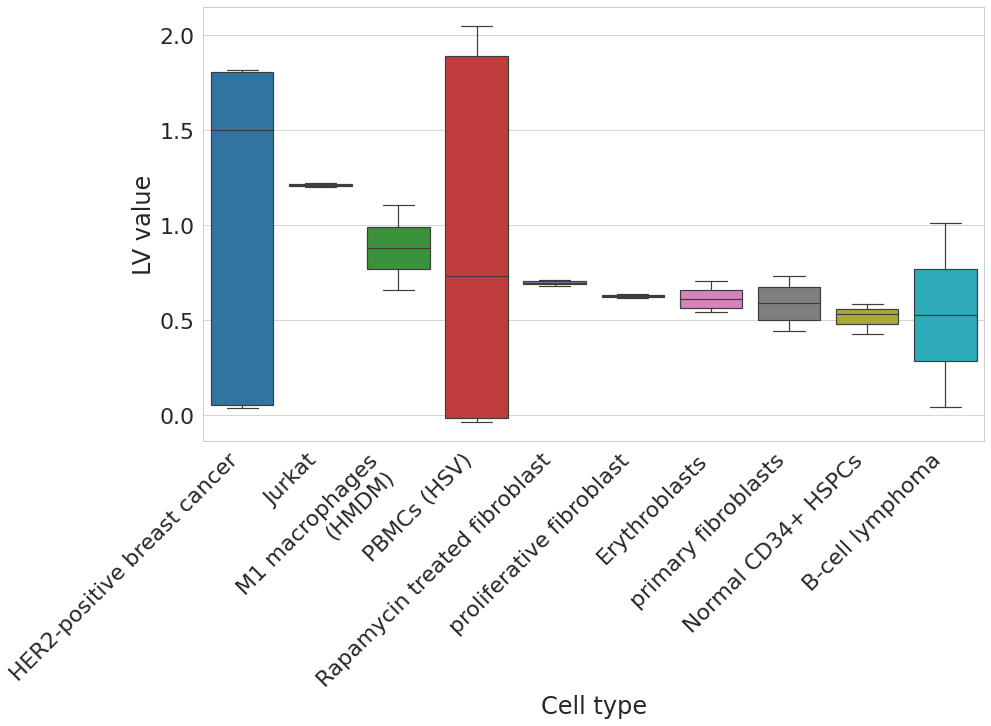

In [43]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = sns.boxplot(
        data=df,
        x="attr",
        y="lv",
        order=cat_order,
        linewidth=None,
        ax=ax,
    )
    ax.set_xlabel("Cell type")
    ax.set_ylabel("LV value")
    plt.xticks(rotation=45, horizontalalignment="right")

    output_dir = Path(
        "/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/drug_disease_prediction/"
    )
    output_filepath = output_dir / "niacin-at-modules_cell_types.svg"
    display(output_filepath)
    plt.savefig(
        output_filepath,
        bbox_inches="tight",
    )

# Tissues

In [ ]:
df = pd.concat(tissue_dfs[:N_TOP_LVS], ignore_index=True)
# df = pd.concat([_get_lv_rank(x) for x in tissue_dfs[:N_TOP_LVS]], ignore_index=True)

In [ ]:
df.groupby("attr").mean().squeeze().sort_values(ascending=False).head(50)

# LV analysis

In [ ]:
lv_obj = LVAnalysis("LV116", data)

In [ ]:
lv_obj.lv_genes.head(20)

In [ ]:
lv_data = lv_obj.get_experiments_data()

In [ ]:
lv_data.shape

In [ ]:
_tmp = lv_data[["cell type", "LV116"]].dropna()

In [ ]:
_tmp[_tmp["cell type"].str.contains("M1")]

In [ ]:
_tmp[_tmp["cell type"].str.contains("CD14")]

In [ ]:
lv_obj2 = LVAnalysis("LV881", data)

In [ ]:
lv_obj2.lv_genes.head(20)

In [ ]:
lv_attrs = lv_obj.get_attributes_variation_score()
_tmp = pd.Series(lv_attrs.index)
lv_attrs = lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)
display(lv_attrs)

In [ ]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = lv_obj2.plot_attribute("tissue", top_x_values=20)

In [ ]:
with sns.plotting_context("paper", font_scale=1.0), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax = lv_obj2.plot_attribute("cell type", top_x_values=20)